In [17]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,12]
plt.style.use('fivethirtyeight')

from scipy.stats import beta
import numpy as np

In [10]:
df_BA = pd.read_csv('df_BA.csv', index_col = 0)

In [11]:
#from the last notebook, recall:
a, b = 117.98357784382168, 318.54678927619267

# For every player, we can use the fitted Beta distribution to calculate $\alpha_{1}$ and $\beta_{1}$

## $\alpha_{1} = \alpha_{0}+H_{player}$ and $\beta_{1} = \beta_{0} +(\text{Non-hits}) =  \beta_{0} +(AB_{player}-H_{player})$

In [12]:
df_BA['alpha1'] = df_BA['H'] + a
df_BA['beta1'] = df_BA['AB'] - df_BA['H'] + b

In [14]:
df_BA.head()

,playerID,Name,AB,H,average,Empirical Bayes Estimate,alpha1,beta1
0,aaronha01,Hank Aaron,12364,3771,0.304998,0.303814,3888.983578,8911.546789
4,abbated01,Ed Abbaticchio,3044,772,0.253614,0.255703,889.983578,2590.546789
7,abbotku01,Kurt Abbott,2044,523,0.255871,0.258406,640.983578,1839.546789
15,abreubo01,Bobby Abreu,8480,2470,0.291274,0.290246,2587.983578,6328.546789
17,abreujo02,Jose Abreu,1793,537,0.299498,0.293776,654.983578,1574.546789


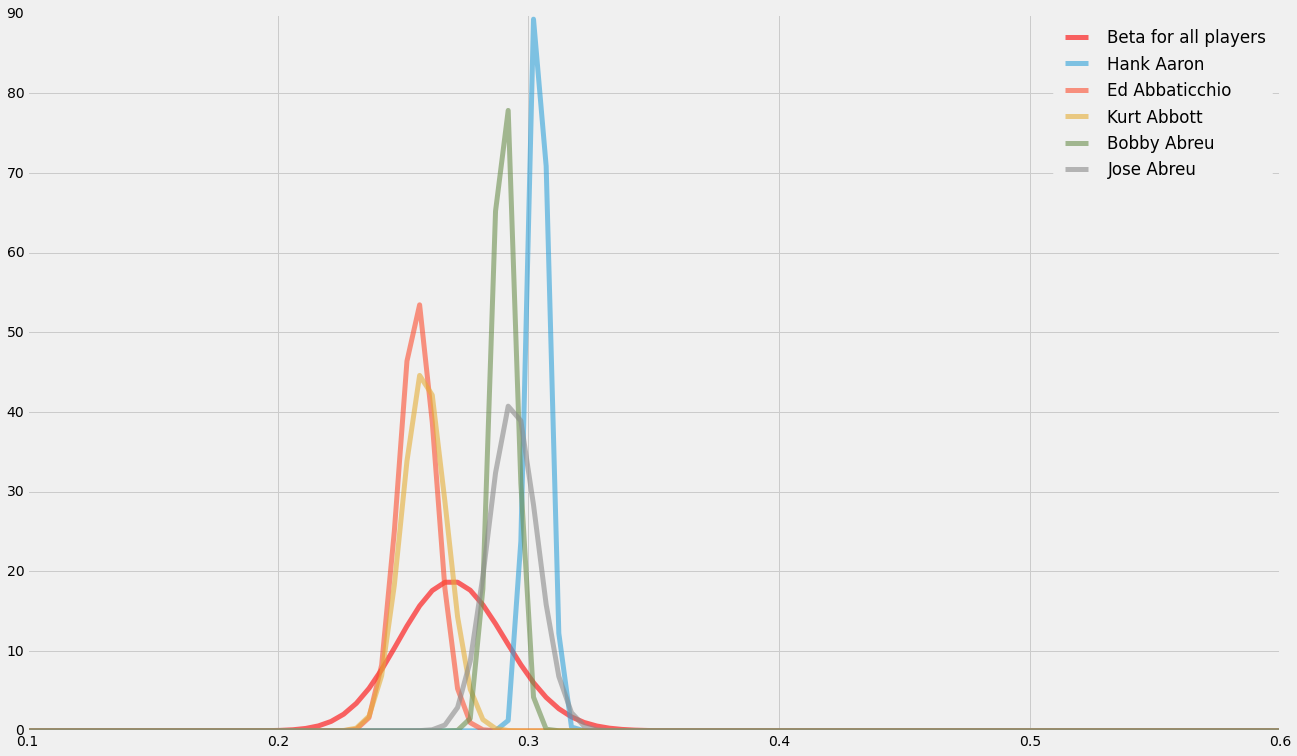

In [22]:
x = np.linspace(0.1,0.6,100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='Beta for all players')

#plotting the posterior beta distributions for the first 5 players
for i in df_BA.index[:5]:
    name = df_BA.loc[i]['Name']
    a1 = df_BA.loc[i]['alpha1']
    b1 = df_BA.loc[i]['beta1']
    plt.plot(x, beta.pdf(x, a1, b1),lw=5, alpha=0.6, label=name)
    
plt.legend()
plt.show()

# A Credible Interval is the range of values for which we can say the majority (e.g 95%) of the distribution is within

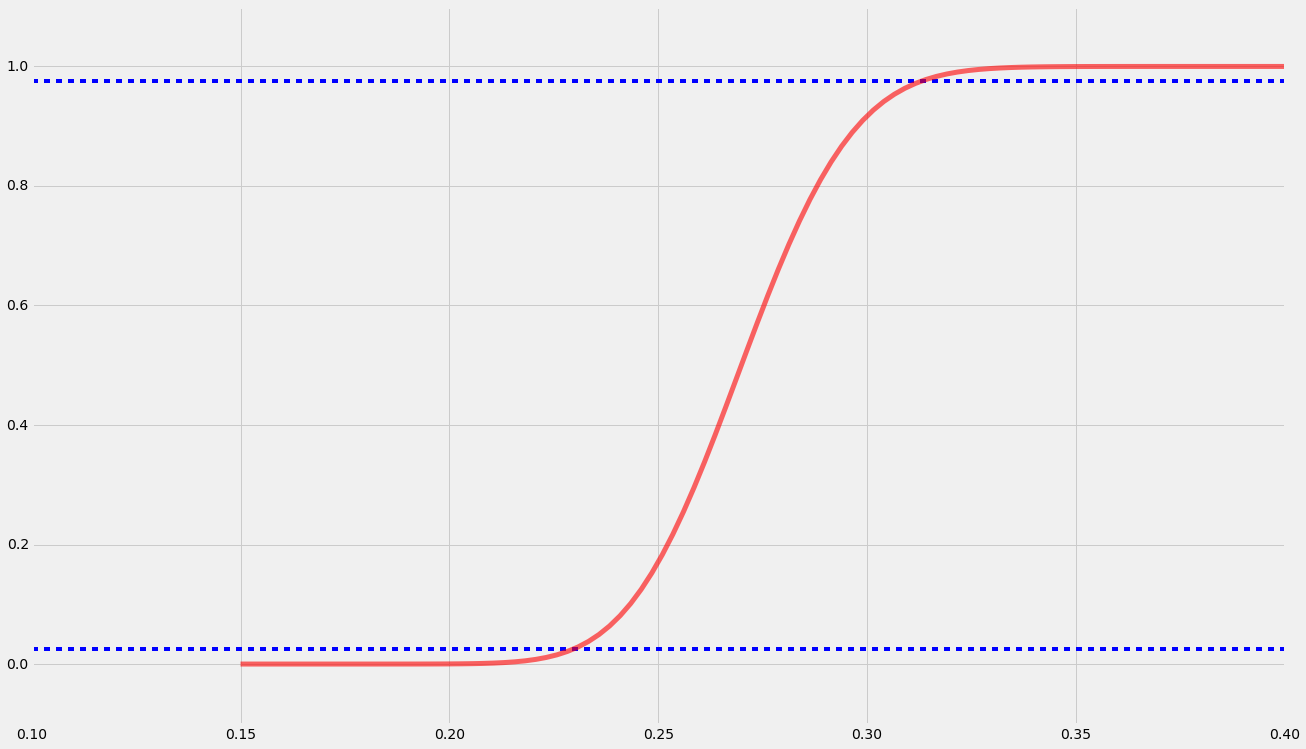

In [30]:
x = np.linspace(0.15,0.4,100)
plt.ylim([-0.1, 1.1])
plt.axhline(0.025, ls = 'dashed')
plt.axhline(0.975, ls = 'dashed')
plt.plot(x, beta.cdf(x, a, b),'r-', lw=5, alpha=0.6, label='Beta for all players')

# In the chart above, we can see that 95% of the Beta distribution for all players lies between around 0.225 and 0.32

('Hank Aaron', 0.29587665948296177, 0.31180991322820228)
('Ed Abbaticchio', 0.24134653267511647, 0.27032625974881819)


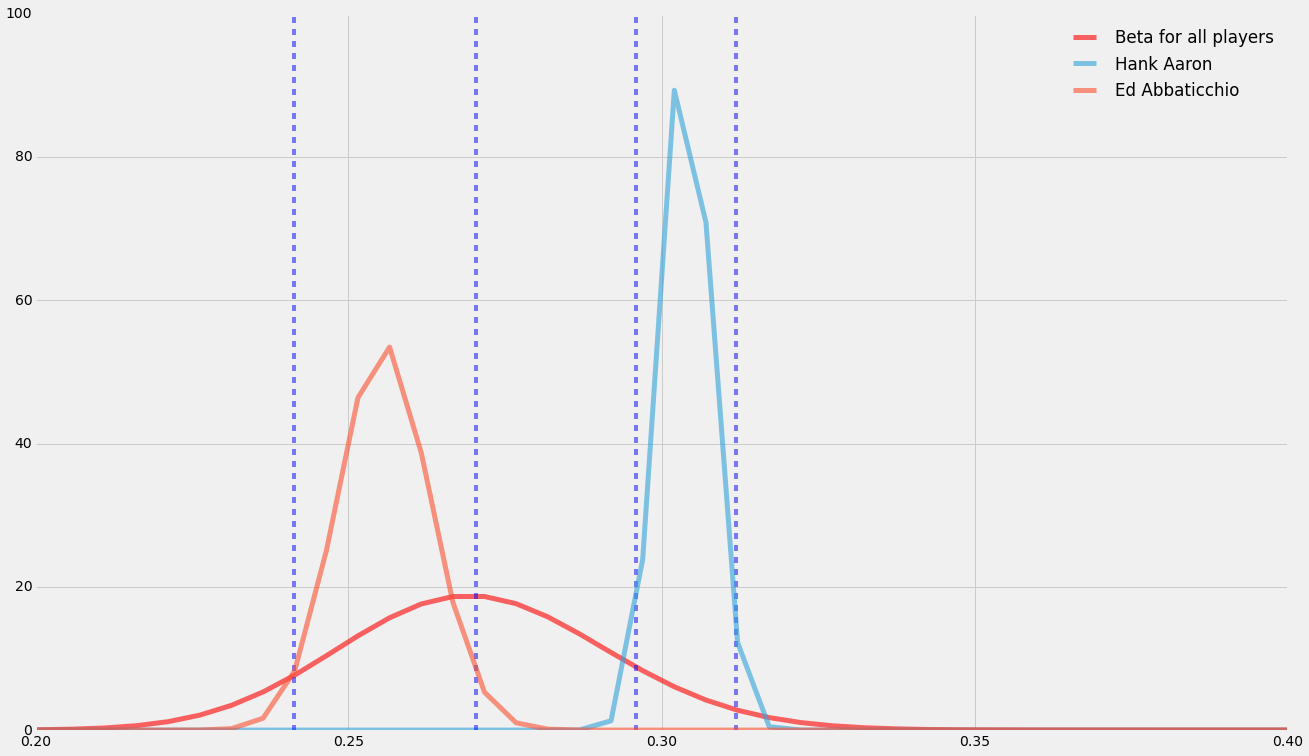

In [36]:
x = np.linspace(0.1,0.6,100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='Beta for all players')

#plotting the posterior beta distributions for the first 5 players
for i in df_BA.index[:2]:
    name = df_BA.loc[i]['Name']
    a1 = df_BA.loc[i]['alpha1']
    b1 = df_BA.loc[i]['beta1']
    v_low = beta.ppf(0.025, a1, b1)
    v_high = beta.ppf(1-0.025, a1, b1)
    print(name, v_low, v_high)
    plt.axvline(v_low, ls = 'dashed', alpha = 0.5)
    plt.axvline(v_high, ls = 'dashed', alpha = 0.5)
    plt.plot(x, beta.pdf(x, a1, b1),lw=5, alpha=0.6, label=name)

plt.ylim([-0.1, 100])
plt.xlim([0.2, 0.4])
plt.legend()
plt.show()

# Therefore we can say with 95% accuracy Hank Aaron's true batting average is within 0.295 and 0.312

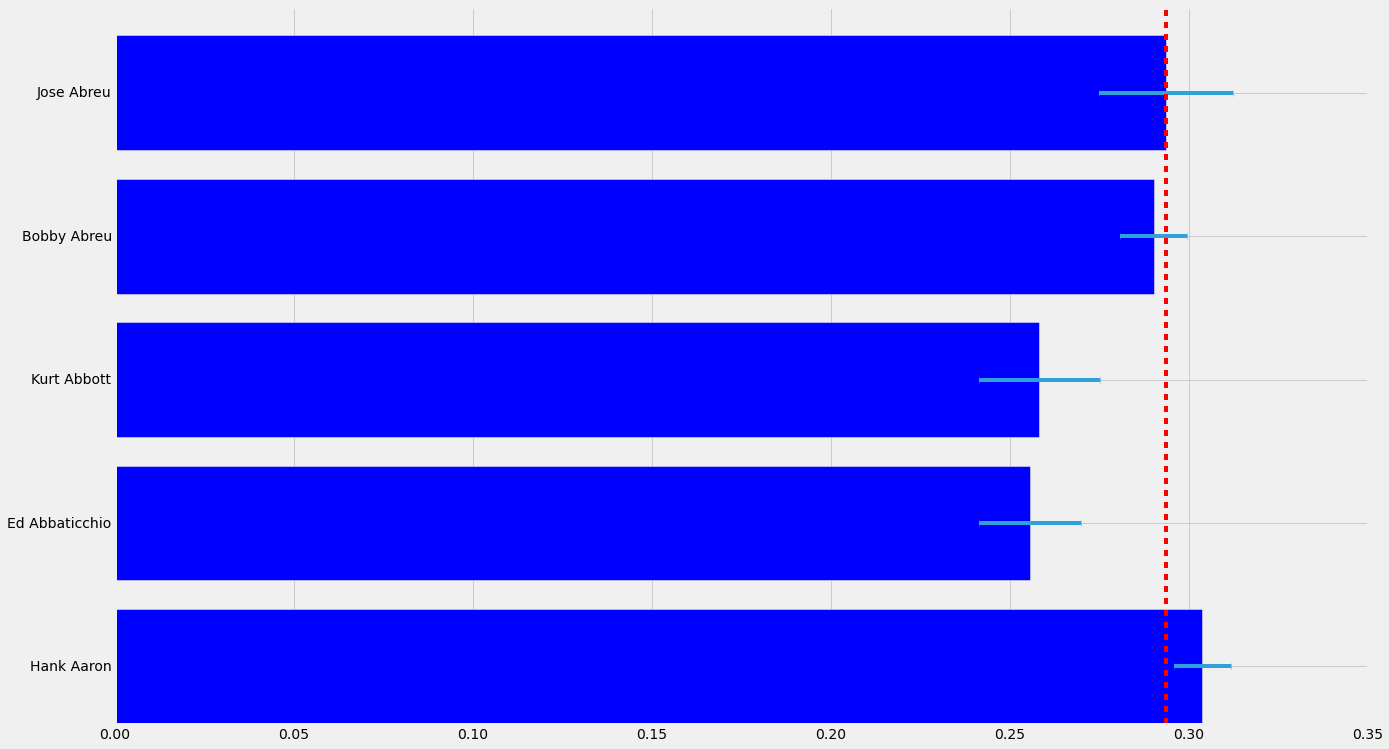

In [65]:
#looking at the first 5 players again
names = []
means = []
intervals = []

for i in df_BA.index[:5]:
    name = df_BA.loc[i]['Name']
    a1 = df_BA.loc[i]['alpha1']
    b1 = df_BA.loc[i]['beta1']
    v_low = beta.ppf(0.025, a1, b1)
    mean = beta.ppf(0.5, a1, b1)
    v_high = beta.ppf(1-0.025, a1, b1)
    interval = [v_low, v_high]
    
    names.append(name)
    means.append(mean)
    intervals.append(mean-v_low)
    
plt.barh(np.arange(5), means, xerr = intervals)
plt.axvline(mean, ls = 'dashed',color =  'r')
plt.yticks(np.arange(5)+0.4, names)
plt.show()

# From the chart above, we can say with 95% confidence that Ed Abbatocchio had a below average "real" batting average